In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv
/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_excel("/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [45]:
df.shape

(10683, 11)

In [46]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [48]:
df.isnull().sum()             #df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [49]:
df.dropna(inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
df.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [51]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [52]:
# Categorical Columns
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

# 1. Top Carriers by No. of Flights

In [53]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [54]:
# Rename row with name 'Multiple carriers Premium economy' to 'MCPA'
# Rename row with name 'Jet Airways Bussiness' to 'JAB'
# Rename row with name 'Vistara Premium economy' to 'VPE'
# Rename row with name 'Multiple carriers' to 'MCPA'

df.loc[df['Airline'] == 'Multiple carriers Premium economy', 'Airline'] = 'MCPA'
df.loc[df['Airline'] == 'Jet Airways Business', 'Airline'] = 'JAB'
df.loc[df['Airline'] == 'Vistara Premium economy', 'Airline'] = 'VPE'
df.loc[df['Airline'] == 'Multiple carriers', 'Airline'] = 'MC'

<Axes: xlabel='Airline', ylabel='count'>

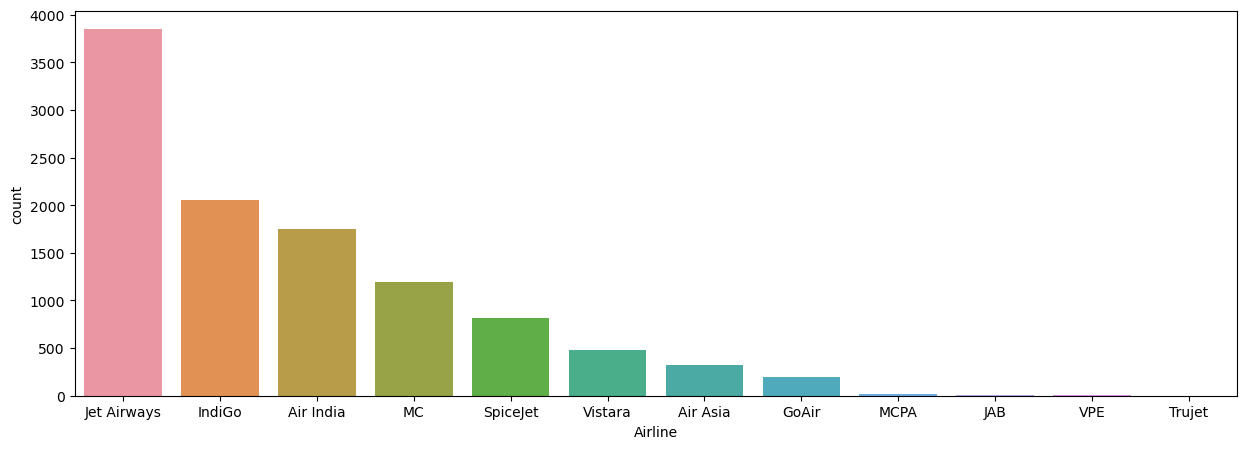

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'], order=df['Airline'].value_counts().index)

**- Conclusions :**

*  Jet Airways operates the most no.of flights

# 2. Distribution of Ticket Prices.

**2.1. Histogram and RDE Plot of Ticket Prices**

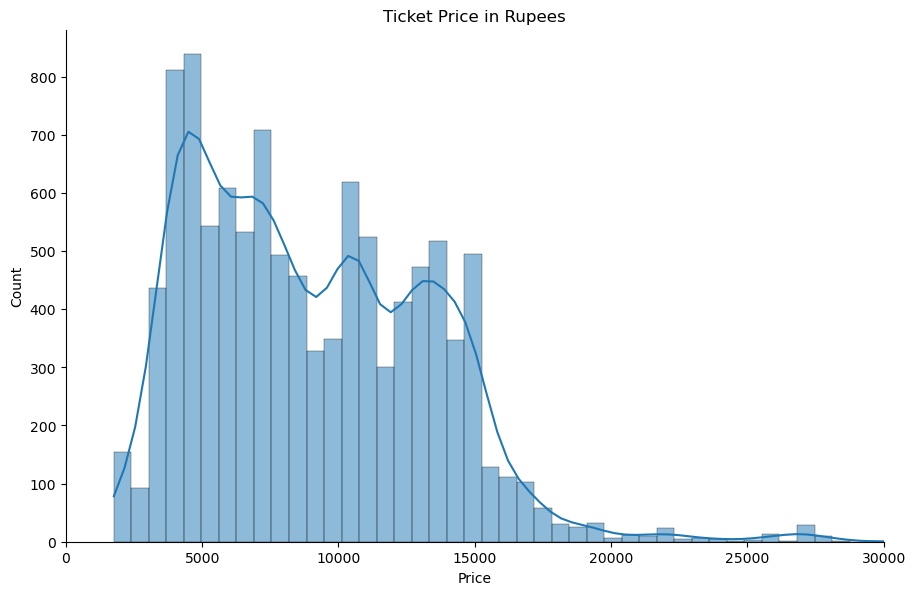

In [56]:
ticket_price = sns.displot(x=df['Price'], data=df, kde=True)
plt.title('Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))

**- Conclusion: Most of the Tickets are priced between 4000-15000 INR**

**2.2. Airline Vs Price**

<Axes: xlabel='Airline', ylabel='Price'>

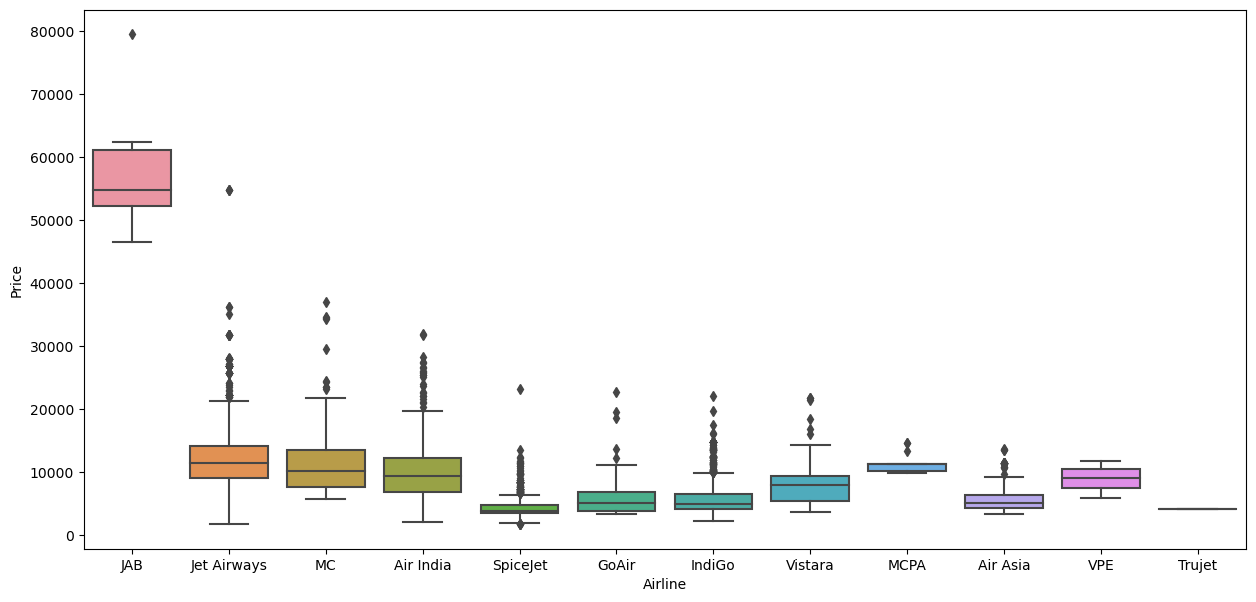

In [98]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

**2.3. Source of City vs Prices**

In [92]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

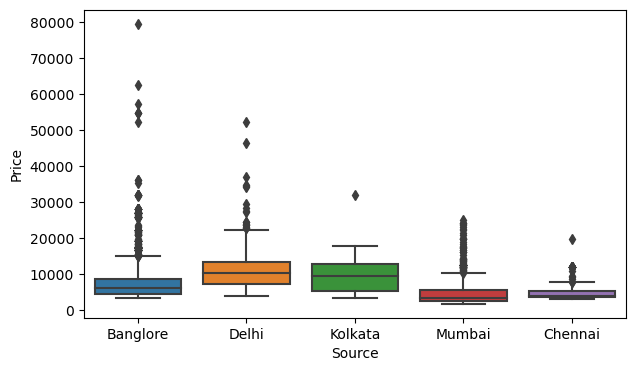

In [93]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

**2.4. Destination City Vs Price**

In [94]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

# 3. Busiest Air Routes

In [57]:
busy_routes = df['Route'].value_counts().reset_index().set_index('index')
busy_routes.head()

,Route
index,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


**- Conclusion-  Delhi to Cochin via Mumbai is the busiest route with 2376 flights.**

# 4. Airports with most number of flights.

In [61]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='count'>

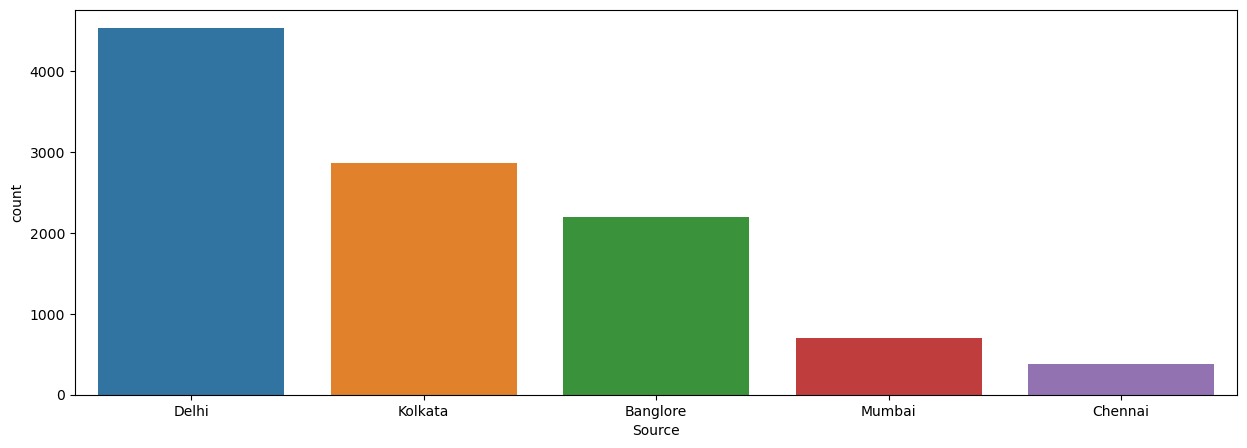

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Source'], order=df['Source'].value_counts().index)

**Conclusions - Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.**

# 5. Peak Day of the Month

In [24]:
df_new = df.copy()

df_new['date']=df_new['Date_of_Journey'].str.split('/').str[0]
df_new['month']=df_new['Date_of_Journey'].str.split('/').str[1]
df_new['year']=df_new['Date_of_Journey'].str.split('/').str[2]

df_new.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


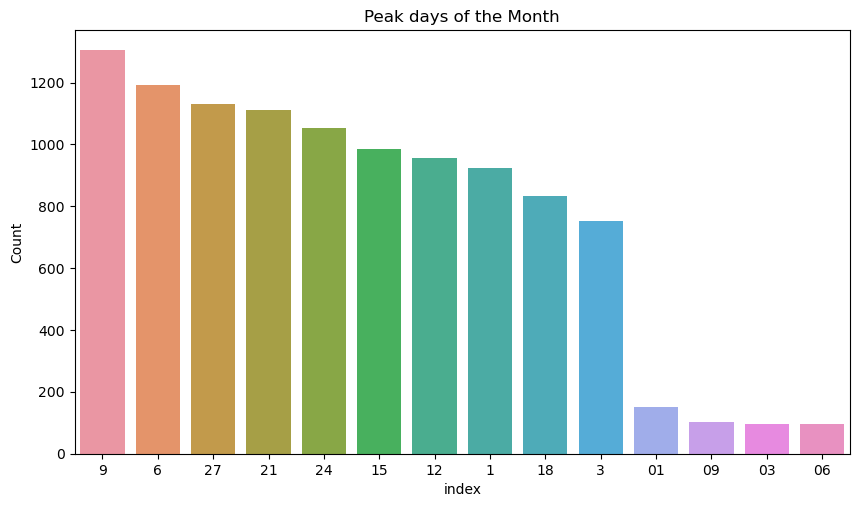

In [25]:
peak_month = df_new['date'].value_counts().reset_index().set_index('index')

plt.figure(figsize=(10,5.5))
sns.barplot(x=peak_month.index, y=peak_month.date)
plt.ylabel('Count')
plt.title('Peak days of the Month')
plt.show()

**Conclusion- Day 9 is the peak day of the month.**

**Data Processing for Peak Hour for Departure and Arrival**

In [32]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [35]:
#splitting Departure time into hour and min column :

df_new['dept_hour']=df['Dep_Time'].str.split(':').str[0]
df_new['dept_min']=df['Dep_Time'].str.split(':').str[1]

df_new['dept_hour']=df_new['dept_hour'].astype(int)
df_new['dept_min']=df_new['dept_min'].astype(int)

In [36]:
#splitting Arrival time into hour and min column :

df_new['arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df_new['arrival_min']=df['Arrival_Time'].str.split(':').str[1]

df_new['arrival_hour']=df_new['arrival_hour'].astype(int)
df_new['arrival_min']=df_new['arrival_hour'].astype(int)

In [37]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,dept_hour,dept_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,9,25,4,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,21


# 6. Peak Hour for Departure

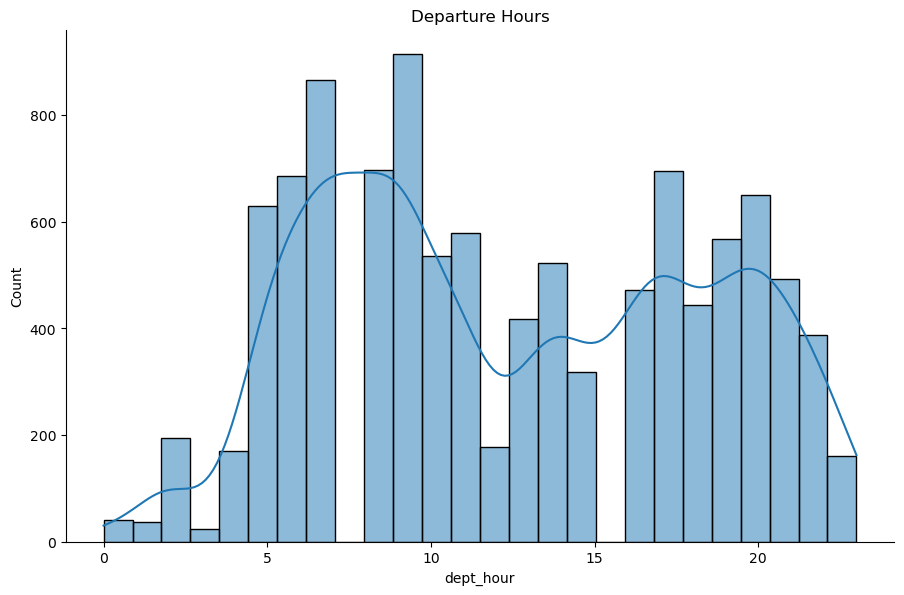

In [41]:
dept_hour = sns.displot(x=df_new['dept_hour'], data=df_new, kde=True)
plt.title('Departure Hours')
dept_hour.fig.set_figwidth(10)
dept_hour.fig.set_figheight(6)

**Conclusion- 9AM is the peak hour for Departure**

# 7. Peak Hour for Arrival

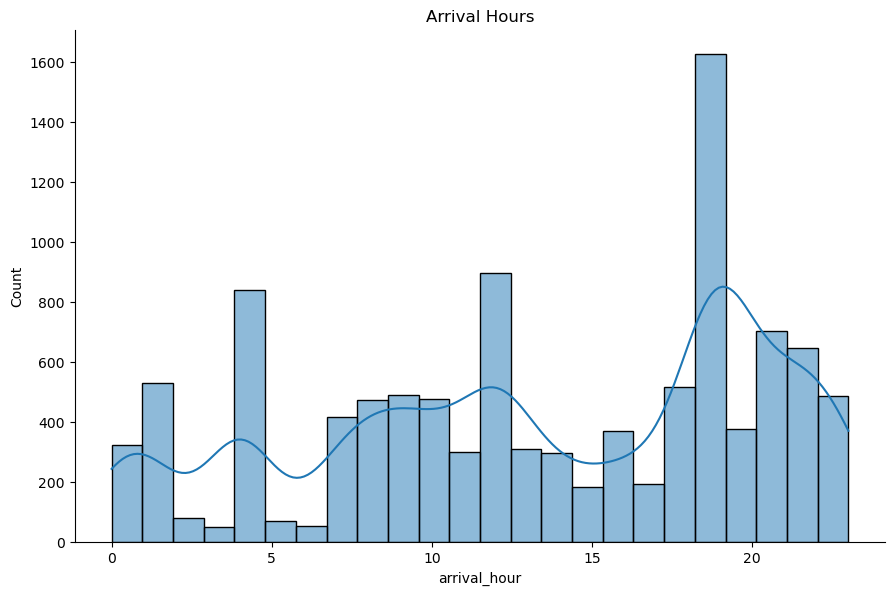

In [39]:
arr_hour = sns.displot(x=df_new['arrival_hour'], data=df_new, kde=True)
plt.title('Arrival Hours')
arr_hour.fig.set_figwidth(10)
arr_hour.fig.set_figheight(6)

**Conclusion: 6PM is the peak hour for Arrival**

# 8. Pairplotting Cities with other variables

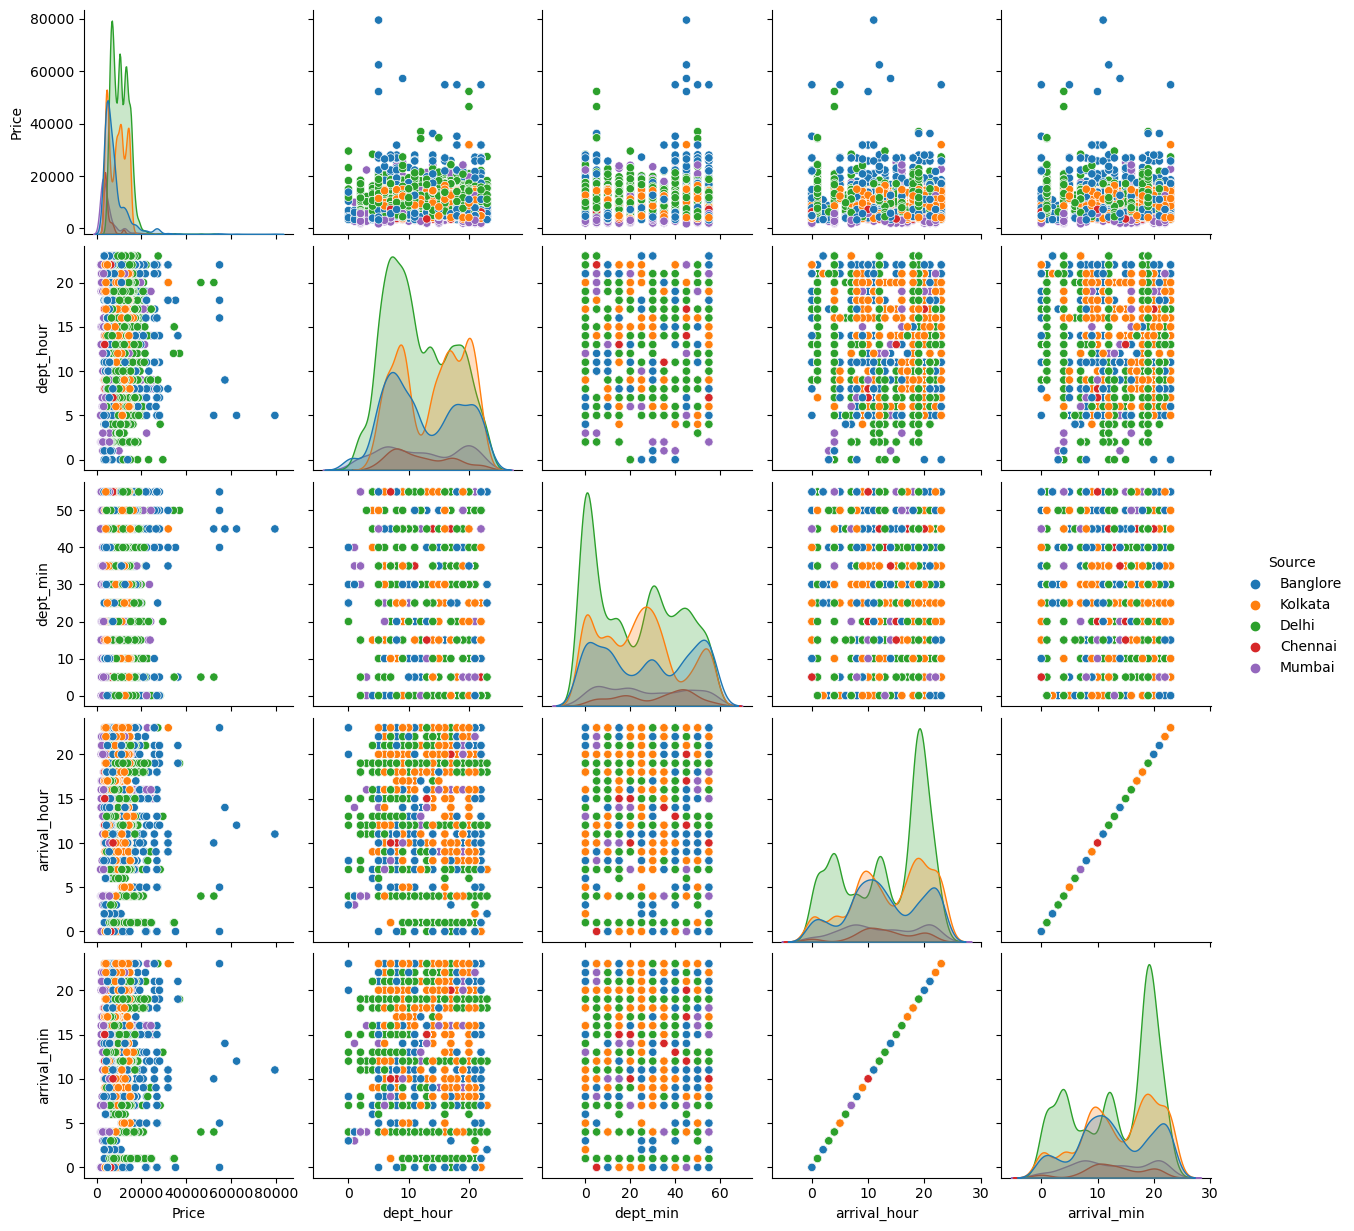

In [66]:
sns.pairplot(df_new,hue = 'Source')
plt.show()

# 9. Heat Maps

In [108]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


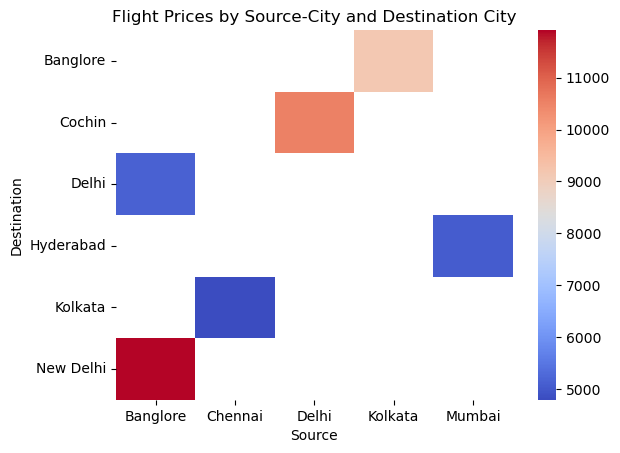

In [120]:
# Create a pivot table with price, city, and airline as the rows and columns
pivot_table = df.pivot_table(values='Price', index='Destination', columns='Source')

# Create a heatmap using the pivot table
sns.heatmap(pivot_table, cmap='coolwarm')

# Set the plot title
plt.title('Flight Prices by Source-City and Destination City')

# Display the plot
plt.show()


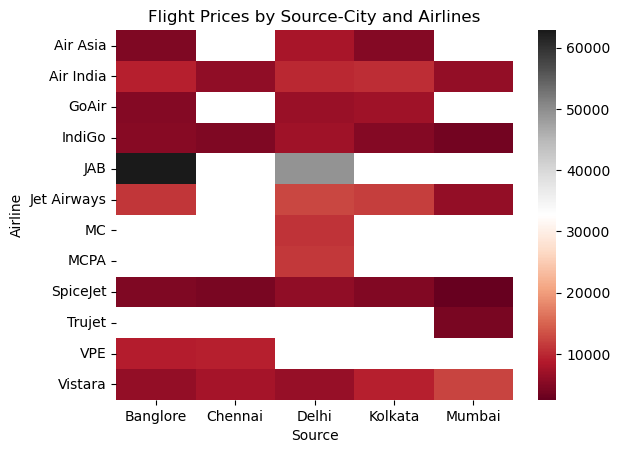

In [126]:
# Create a pivot table with price, city, and airline as the rows and columns
pivot_table = df.pivot_table(values='Price', index='Airline', columns='Source')

# Create a heatmap using the pivot table
sns.heatmap(pivot_table, cmap='RdGy')

# Set the plot title
plt.title('Flight Prices by Source-City and Airlines')

# Display the plot
plt.show()